## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data from  link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


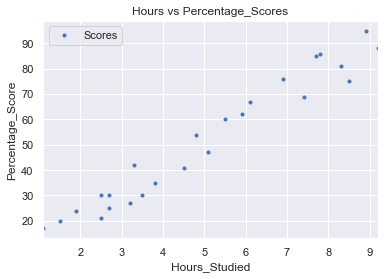

In [7]:
# Plotting the distribution of scores
sns.set()
data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Percentage_Score')  
plt.show()

From the above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [8]:
#preparing the data for training the model
X=data['Hours'].values
Y=data['Scores'].values

In [9]:
print(X.shape)
print(Y.shape)

(25,)
(25,)


In [10]:
#import library for train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [11]:
print('Trainning data size :',X_train.shape,Y_train.shape)
print('Testing data size :',X_test.shape,Y_test.shape)

Trainning data size : (20,) (20,)
Testing data size : (5,) (5,)


In [12]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'Hours'.
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [13]:
print('Trainning data size :',X_train.shape,Y_train.shape)
print('Testing data size :',X_test.shape,Y_test.shape)

Trainning data size : (20, 1) (20,)
Testing data size : (5, 1) (5,)


## Performing Linear Regression

In [14]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
model = LinearRegression()

# Fit the model using model.fit()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Coefficients Calculation

In [15]:
# Print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

2.018160041434683
[9.91065648]


$y = 2.0181 + 9.9106 \times Hours $<br>

Now, let's use this equation to predict our scores.

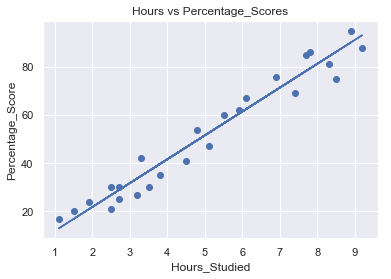

In [16]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
sns.set()
plt.scatter(X, Y)
plt.plot(X, line);
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Percentage_Score')
plt.show()

In [17]:
# Making predictions on the testing set
Y_pred = model.predict(X_test)

In [18]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# we can also test with your own data
hours =np.array([9.25])
hours=hours[:, np.newaxis]
New_pred = model.predict(hours)
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(New_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


If student studied 9.25 hours student can score 93.69 % .

#### Computing RMSE and R^2 Values

Text(0, 0.5, 'Percentage_Score')

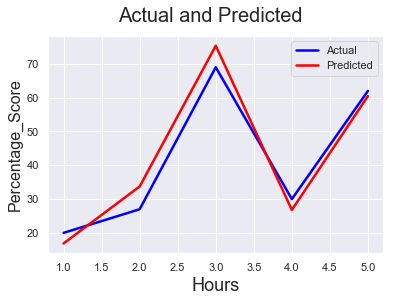

In [21]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,6,1)]         # generating index 
sns.set()
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-",label='Actual')
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-",label='Predicted')
plt.legend()
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading 
plt.xlabel('Hours', fontsize=18)                   # X-label
plt.ylabel('Percentage_Score', fontsize=16)       # Y-label

Text(0, 0.5, 'Ytest-Ypred')

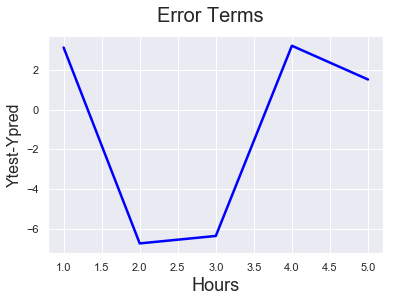

In [22]:
# Error terms
c = [i for i in range(1,6,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Hours', fontsize=18)                      # X-label
plt.ylabel('Ytest-Ypred', fontsize=16)                # Y-label

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [24]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 21.5987693072174
r_square_value : 0.9454906892105356


In [25]:
print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


The model performing good the r_square is 94%